In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Add, Concatenate, MaxPooling2D, AveragePooling2D, concatenate, Flatten, Dense, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import keras.backend as K
import tensorflow as tf
import pandas as pd
import numpy as np

In [11]:
train_dir = r'C:\\Users\\HP\\Desktop\\project\\Code\\Training all models\\RiceLeafsDisease\\train'
test_dir = r'C:\\Users\\HP\\Desktop\\project\\Code\\Training all models\\RiceLeafsDisease\\validation'

val_loss = list()
val_accuracy = list()
test_loss= list()
test_accuracy = list()

In [3]:
BATCH_SIZE = 32
seeds = 41
im_shape = (250,250)

In [12]:
# Load and preprocess the training data
train_generator = ImageDataGenerator(rescale=1./255, rotation_range=40,shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,horizontal_flip=True,validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, rotation_range=40,shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,horizontal_flip=True,validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1./255, rotation_range=40,shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,horizontal_flip=True)

# Generator of Train
train_generator = train_generator.flow_from_directory(train_dir, target_size=im_shape, shuffle=True, seed=seeds,
                                                     class_mode='categorical',color_mode='rgb', batch_size=BATCH_SIZE, subset="training")
# Generator of validation
validation_generator = val_data_generator.flow_from_directory(train_dir, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical',color_mode='rgb', batch_size=BATCH_SIZE, subset="validation")

# Generator of dataset test
test_generator = test_generator.flow_from_directory(test_dir, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical',color_mode='rgb', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)


Found 1680 images belonging to 6 classes.
Found 420 images belonging to 6 classes.
Found 528 images belonging to 6 classes.
Classes: ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot']


## VGG16

In [2]:
from tensorflow.keras.applications import VGG16

In [3]:
vgg_base = VGG16(  
    include_top=False,  
    weights='imagenet',  
    input_shape=(250, 250, 3),  
)  
   
vgg_base.trainable = False  
  
set_trainable = False  

for layer in vgg_base.layers:  
    if layer.name == 'block5_conv1':  
        set_trainable = True  
    if set_trainable:  
        layer.trainable = True  
  
vgg_model = Sequential()  
  
vgg_model.add(vgg_base)  
  

vgg_model.add(Flatten())  

vgg_model.add(Dense(200, activation='relu'))  

vgg_model.add(Dense(6, activation='softmax'))  


In [4]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 200)               5017800   
                                                                 
 dense_1 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 19,733,694
Trainable params: 5,019,006
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
#compiling 
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
import time
# Record the start time of training
start_time = time.time()

In [11]:
# Train the model
epochs = 10

#Training
history_2 = vgg_model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/10


2024-03-31 14:13:48.449306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-03-31 14:13:49.891220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-31 14:13:49.895980: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d223d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-31 14:13:49.896046: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-03-31 14:13:49.907866: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-31 14:13:50.060620: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proce

112/112 [==============================] - 50s 407ms/step - loss: 1.6047 - accuracy: 0.5151 - val_loss: 0.9874 - val_accuracy: 0.6571
Epoch 2/10
112/112 [==============================] - 47s 419ms/step - loss: 0.7973 - accuracy: 0.7019 - val_loss: 0.8732 - val_accuracy: 0.6731
Epoch 3/10
112/112 [==============================] - 49s 442ms/step - loss: 0.6968 - accuracy: 0.7355 - val_loss: 0.7404 - val_accuracy: 0.7147
Epoch 4/10
112/112 [==============================] - 48s 431ms/step - loss: 0.5612 - accuracy: 0.7858 - val_loss: 0.5910 - val_accuracy: 0.7788
Epoch 5/10
112/112 [==============================] - 49s 436ms/step - loss: 0.5233 - accuracy: 0.8048 - val_loss: 0.6594 - val_accuracy: 0.7372
Epoch 6/10
112/112 [==============================] - 51s 452ms/step - loss: 0.4790 - accuracy: 0.8249 - val_loss: 0.5798 - val_accuracy: 0.7821
Epoch 7/10
112/112 [==============================] - 48s 432ms/step - loss: 0.4853 - accuracy: 0.8121 - val_loss: 0.5828 - val_accuracy: 0.7

In [12]:
# Record the training end time
end_time = time.time()

In [13]:
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 597.0996775627136 seconds


In [14]:
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,1.604684,0.515101,0.987384,0.657051
1,0.797328,0.701902,0.873213,0.673077
2,0.696836,0.735459,0.740438,0.714744
3,0.561246,0.785794,0.590965,0.778846
4,0.523329,0.804810,0.659369,0.737179
5,0.479039,0.824944,0.579830,0.782051
6,0.485348,0.812081,0.582803,0.775641
7,0.425136,0.835570,0.533188,0.791667
8,0.380437,0.847875,0.681669,0.759615
9,0.424024,0.843960,0.539757,0.814103


In [15]:
import joblib

joblib.dump(history_2.history,'history_VGG.pkl')
history_CNN2 = joblib.load('history_VGG.pkl')

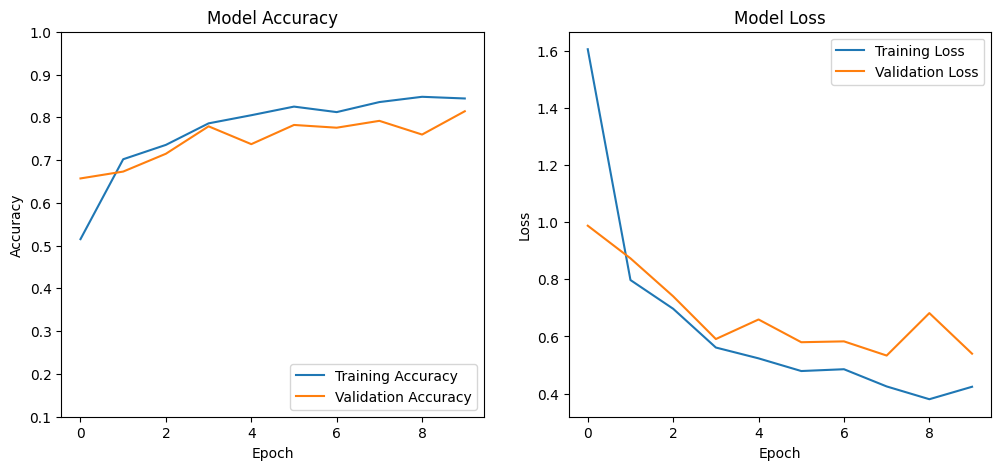

In [16]:
#Training accuracy and validation accuracy graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_CNN2['accuracy'])
plt.plot(history_CNN2['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.1, 1)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc ='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_CNN2['loss'])
plt.plot(history_CNN2['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc ='upper right')

plt.show()

In [17]:
vgg_model.save('VGG16_model.h5')

/environment/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


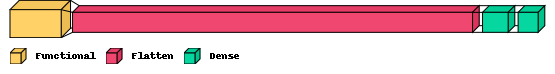

In [28]:
import visualkeras

visualkeras.layered_view(model_2,  legend=True)